In [1]:
#importando bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Criando o DataFrame com os dados enviados pela NetFlix
df = pd.read_csv(r'ViewingActivity.csv')
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Bruna,2020-11-12 23:44:48,00:00:16,Autoplayed: user action: None;,Trailer: Amor com Data Marcada,TRAILER,LG 2018 Mstar M3 Standard DTV Smart TV,00:00:16,00:00:16,BR (Brazil)
1,Bruno,2020-11-12 16:38:55,00:13:06,NaN,O Sangue de Zeus: Temporada 1: De volta ao Oli...,NaN,Netflix AndroidLegacySTB Android,00:13:08,00:13:08,BR (Brazil)
2,Bruno,2020-11-12 16:15:43,00:23:02,NaN,O Sangue de Zeus: Temporada 1: Fugir ou morrer...,NaN,Netflix AndroidLegacySTB Android,00:23:06,00:23:06,BR (Brazil)
3,Bruno,2020-11-12 15:46:56,00:28:43,NaN,O Sangue de Zeus: Temporada 1: Nasce um monstr...,NaN,Netflix AndroidLegacySTB Android,00:28:47,00:28:47,BR (Brazil)
4,Bruno,2020-11-12 15:36:20,00:10:30,NaN,O Sangue de Zeus: Temporada 1: Ataque (Episódi...,NaN,Netflix AndroidLegacySTB Android,00:24:28,00:24:28,BR (Brazil)


In [3]:
#verificando o tamanho da tabela
df.shape

(11511, 10)

In [4]:
#verificando os campos da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11511 entries, 0 to 11510
Data columns (total 10 columns):
Profile Name               11511 non-null object
Start Time                 11511 non-null object
Duration                   11511 non-null object
Attributes                 2172 non-null object
Title                      11511 non-null object
Supplemental Video Type    237 non-null object
Device Type                11511 non-null object
Bookmark                   11511 non-null object
Latest Bookmark            11511 non-null object
Country                    11511 non-null object
dtypes: object(10)
memory usage: 899.4+ KB


In [5]:
#deletando campos desnecessarios para analise
df.drop(['Attributes','Supplemental Video Type','Bookmark', 'Latest Bookmark', 'Country'], axis=1, inplace=True)
df.head()

,Profile Name,Start Time,Duration,Title,Device Type
0,Bruna,2020-11-12 23:44:48,00:00:16,Trailer: Amor com Data Marcada,LG 2018 Mstar M3 Standard DTV Smart TV
1,Bruno,2020-11-12 16:38:55,00:13:06,O Sangue de Zeus: Temporada 1: De volta ao Oli...,Netflix AndroidLegacySTB Android
2,Bruno,2020-11-12 16:15:43,00:23:02,O Sangue de Zeus: Temporada 1: Fugir ou morrer...,Netflix AndroidLegacySTB Android
3,Bruno,2020-11-12 15:46:56,00:28:43,O Sangue de Zeus: Temporada 1: Nasce um monstr...,Netflix AndroidLegacySTB Android
4,Bruno,2020-11-12 15:36:20,00:10:30,O Sangue de Zeus: Temporada 1: Ataque (Episódi...,Netflix AndroidLegacySTB Android


In [6]:
#Renomeando colunas
df.columns = ['Profile_Name','Start_Time','Duration','Title','Device_Type']

In [7]:
#Verificando a existencia de dados nulos
df.isna().values.any()

False

In [8]:
#verificando os tipos de dados de cada coluna
df.dtypes

Profile_Name    object
Start_Time      object
Duration        object
Title           object
Device_Type     object
dtype: object

In [9]:
#convertendo a coluna Start_Time para DateTime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], utc=True)
df.dtypes

Profile_Name                 object
Start_Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device_Type                  object
dtype: object

In [10]:
#setando a coluna Start_time como index
df = df.set_index('Start_Time')

#Convertendo o fuso horario UTC
df.index = df.index.tz_convert('America/Sao_paulo')

#tornando o Start_time uma coluna novamente
df = df.reset_index()

df.head()

,Start_Time,Profile_Name,Duration,Title,Device_Type
0,2020-11-12 21:44:48-02:00,Bruna,00:00:16,Trailer: Amor com Data Marcada,LG 2018 Mstar M3 Standard DTV Smart TV
1,2020-11-12 14:38:55-02:00,Bruno,00:13:06,O Sangue de Zeus: Temporada 1: De volta ao Oli...,Netflix AndroidLegacySTB Android
2,2020-11-12 14:15:43-02:00,Bruno,00:23:02,O Sangue de Zeus: Temporada 1: Fugir ou morrer...,Netflix AndroidLegacySTB Android
3,2020-11-12 13:46:56-02:00,Bruno,00:28:43,O Sangue de Zeus: Temporada 1: Nasce um monstr...,Netflix AndroidLegacySTB Android
4,2020-11-12 13:36:20-02:00,Bruno,00:10:30,O Sangue de Zeus: Temporada 1: Ataque (Episódi...,Netflix AndroidLegacySTB Android


In [11]:
##convertendo a coluna Duracion para TimeDelta
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start_Time      datetime64[ns, America/Sao_Paulo]
Profile_Name                               object
Duration                          timedelta64[ns]
Title                                      object
Device_Type                                object
dtype: object

In [12]:
#demembrando dados da coluna Title e transformando em 'Title_name','Season','Episode'
df[['Title_name','Season','Episode']] = df['Title'].str.split(':', n=2, expand=True)

df.drop('Title',axis=1, inplace=True)
df.head()

,Start_Time,Profile_Name,Duration,Device_Type,Title_name,Season,Episode
0,2020-11-12 21:44:48-02:00,Bruna,00:00:16,LG 2018 Mstar M3 Standard DTV Smart TV,Trailer,Amor com Data Marcada,None
1,2020-11-12 14:38:55-02:00,Bruno,00:13:06,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,De volta ao Olimpo (Episódio 6)
2,2020-11-12 14:15:43-02:00,Bruno,00:23:02,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,Fugir ou morrer (Episódio 5)
3,2020-11-12 13:46:56-02:00,Bruno,00:28:43,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,Nasce um monstro (Episódio 4)
4,2020-11-12 13:36:20-02:00,Bruno,00:10:30,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,Ataque (Episódio 3)


In [13]:
#criando os campos dia e hora de exibição
df['Weekday'] = df['Start_Time'].dt.weekday
df['Hour'] = df['Start_Time'].dt.hour

df.head()

,Start_Time,Profile_Name,Duration,Device_Type,Title_name,Season,Episode,Weekday,Hour
0,2020-11-12 21:44:48-02:00,Bruna,00:00:16,LG 2018 Mstar M3 Standard DTV Smart TV,Trailer,Amor com Data Marcada,None,3,21
1,2020-11-12 14:38:55-02:00,Bruno,00:13:06,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,De volta ao Olimpo (Episódio 6),3,14
2,2020-11-12 14:15:43-02:00,Bruno,00:23:02,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,Fugir ou morrer (Episódio 5),3,14
3,2020-11-12 13:46:56-02:00,Bruno,00:28:43,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,Nasce um monstro (Episódio 4),3,13
4,2020-11-12 13:36:20-02:00,Bruno,00:10:30,Netflix AndroidLegacySTB Android,O Sangue de Zeus,Temporada 1,Ataque (Episódio 3),3,13


In [14]:
#top 10 filmes mais assistidos
df.groupby(['Title_name']).agg({'Duration':'sum'}).sort_values(by='Duration',ascending=False).head(10)

,Duration
Title_name,
Friends,14 days 11:33:04
Três é Demais,5 days 07:23:27
Arrow,4 days 14:00:51
A Anatomia de Grey,4 days 05:42:10
Modern Family,3 days 09:39:51
Um maluco no pedaço,3 days 04:48:47
How I Met Your Mother,3 days 03:18:40
Two and a Half Men,3 days 01:01:30
Rick and Morty,2 days 22:12:31


In [15]:
#verificando qual perfil mais acessa a NetFlix
df.groupby(by='Profile_Name')['Duration'].sum().sort_values(ascending=False)

Profile_Name
Bruno   87 days 04:53:36
Bruna   66 days 06:17:53
Kids     0 days 00:22:38
Name: Duration, dtype: timedelta64[ns]

In [16]:
#separando as 3 series e depois agrupando eleas usando o merge
vikings = df[df['Title_name'] == 'Vikings']
brooklyn = df[df['Title_name'] =='Brooklyn Nine-Nine']
kingdom = df[df['Title_name'] == 'The Last Kingdom']	

fav2 = pd.merge(vikings,brooklyn, how= 'outer')
favoritas = pd.merge(fav2,kingdom, how= 'outer')

favoritas.head()

,Start_Time,Profile_Name,Duration,Device_Type,Title_name,Season,Episode,Weekday,Hour
0,2020-03-05 22:47:41-03:00,Bruno,00:48:49,Netflix AndroidLegacySTB Android,Vikings,Temporada 6,Os melhores planos (Episódio 10),3,22
1,2020-03-05 22:04:00-03:00,Bruno,00:43:37,Netflix AndroidLegacySTB Android,Vikings,Temporada 6,Ressurreição (Episódio 9),3,22
2,2020-03-01 22:45:32-03:00,Bruno,00:00:18,Netflix AndroidLegacySTB Android,Vikings,Temporada 6,Ressurreição (Episódio 9),6,22
3,2020-03-01 22:01:30-03:00,Bruno,00:43:46,Netflix AndroidLegacySTB Android,Vikings,Temporada 6,Valhalla pode esperar (Episódio 8),6,22
4,2020-03-01 21:17:16-03:00,Bruno,00:42:30,Netflix AndroidLegacySTB Android,Vikings,Temporada 6,A mulher do gelo (Episódio 7),6,21


In [17]:
#verificando qual temporada mais asssisti
favoritas.groupby(['Title_name','Season']).agg({'Duration':'sum'}).sort_values(by='Duration',ascending=False).head(5)

Duration
Title_name       Season               
Vikings           Temporada 5 18:06:04
                  Temporada 4 14:28:30
The Last Kingdom  Temporada 3 10:29:24
                  Temporada 2 09:33:28
                  Temporada 4 08:42:40

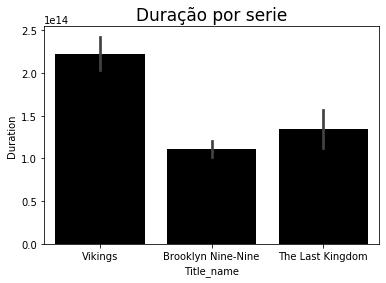

In [18]:
#verificando qual das series mais assisti
ax = sns.barplot(x="Title_name", y="Duration", data=favoritas, estimator=sum,color="black")
ax.set_title('Duração por serie', fontsize=17);

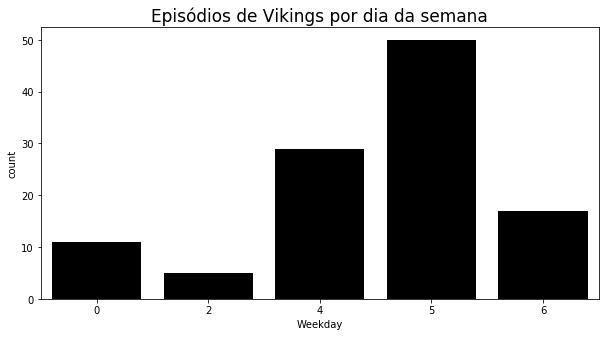

In [19]:
#Em qual dia da semana eu costumo asssitir Vikings
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Weekday", data=brooklyn,color="black")
ax.set_title('Episódios de Vikings por dia da semana', fontsize=17);

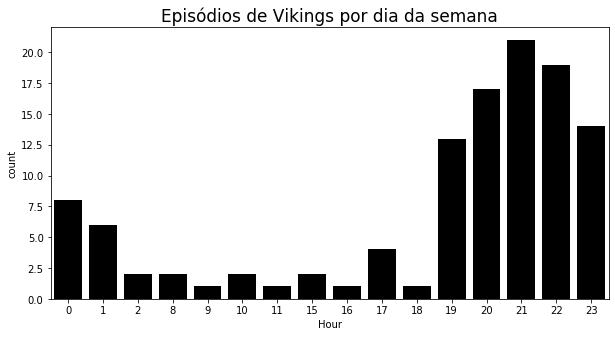

In [20]:
#Em qual horario eu costumo assistir Vikings
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Hour", data=vikings,color="black")
ax.set_title('Episódios de Vikings por dia da semana', fontsize=17);